<a href="https://colab.research.google.com/github/muhammadbilalakbar021/CNN-for-VR/blob/master/FastAI_ImageClassification_Resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
bs = 64


In [5]:
path = untar_data(URLs.PETS); path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

In [7]:
fnames = get_image_files(path_img)
fnames[:10]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/english_setter_46.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_264.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/keeshond_29.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/leonberger_184.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_50.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/chihuahua_136.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/english_setter_65.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Birman_92.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_6.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_184.jpg')]

In [0]:
np.random.seed(2)
pat = re.compile(r'/([^/]+)_\d+.jpg$')

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=bs//2, num_workers=0).normalize(imagenet_stats)

In [10]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 96884041.08it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


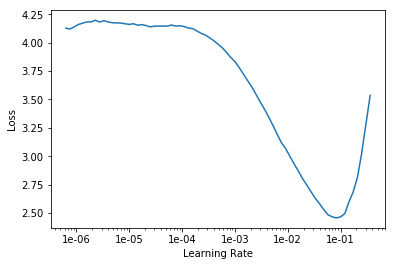

In [11]:
learn.lr_find()
learn.recorder.plot()

In [12]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.728744,0.278431,0.081867,06:03
1,0.418128,0.232338,0.071719,06:02
2,0.337470,0.231457,0.075101,05:59
3,0.286335,0.205960,0.062923,06:02
4,0.202520,0.205902,0.066306,06:03
5,0.162802,0.185957,0.052774,05:51
6,0.115436,0.175111,0.048714,05:56
7,0.092529,0.170526,0.048038,05:54


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


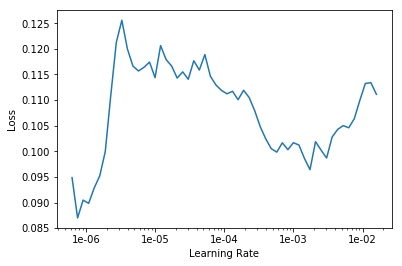

In [13]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.save('stage-1-50')

In [15]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.100398,0.170635,0.050068,07:04
1,0.089462,0.167871,0.047361,07:03
2,0.063266,0.161363,0.041949,07:01


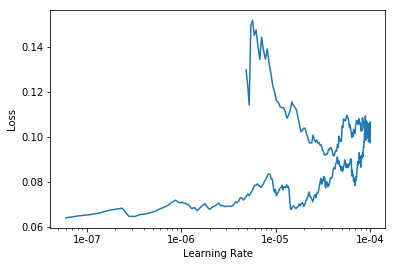

In [16]:
learn.recorder.plot()


In [0]:
learn.save('stage-1-50')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [19]:
interp.most_confused(min_val=2)

[('Birman', 'Ragdoll', 5),
 ('chihuahua', 'miniature_pinscher', 5),
 ('Ragdoll', 'Birman', 4),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Bengal', 'Egyptian_Mau', 2),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Maine_Coon', 'Bengal', 2),
 ('Persian', 'Ragdoll', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 2),
 ('beagle', 'basset_hound', 2),
 ('boxer', 'american_bulldog', 2),
 ('miniature_pinscher', 'american_pit_bull_terrier', 2),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 2)]